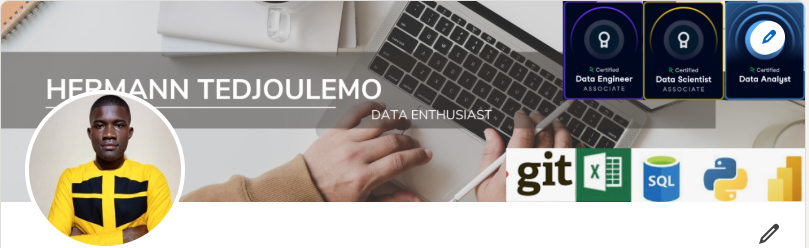

# PROJET SANTE PUBLIQUE : ANALYSE EXPLORATOIRE
## SOMMAIRE 
### <a href= "#R"> 1. RESUME DE L'ANALYSE <a>
### <a href= "#FORME"> 2. ANALYSE DE FORME <a>  
### <a href= "#FOND"> 3. ANALYSE DE FOND <a>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns',None)

## <a id= "R"> 1. RESUME DE L'ANALYSE  <a> 
   ### a-ANALYSE DE FORME
    - le dataframe population : 
       .Nombre de colonne : 3, nombre de ligne : 1416
       .Nom et type de colonnes : Zone : String, Année : int64, Valeur : float64
    
    - le dataframe sous-nutrition : 
       .Nombre de colonne : 3, nombre de ligne : 1218
       .Nom et type de colonnes : Zone : String, Année : String, Valeur : String
    
     - le dataframe dispo_alimentaire : 
       .Nombre de colonne : 18, nombre de ligne : 15605
       .Nom et type de colonnes : Zone : String, Produits : String, Origine : String, et le reste : float64
   ### b- ANALYSE DE FOND
- #### La proportion de personne en etat de sous nutrition est de : 7,09 %
    - La colonne "habitants_sous_nourris" du dataframe sous_nourri contient 58,62% de valeur 'NAN' (Après la convertion de "<0,1\" en float64) qui sont remplacés par 0  dans cette analyse.  
-#### le nombre de personne qu'on peut nourrir en 2017 est de  :  8367593850.9324 (taux de couverture 110%)
-#### Les produits sont à 76,23 % d'origine Végétal, mais la disposition alimentaire des produits végétaux est insuffisante pour nourrir la population mondiale. Avec la disposition des produits vegetaux on peut nourrir 6904305684.6004 personnes soit un taux de couvertur de 91,47% de la population en 2017. 
- #### Sur l'utilisation de la disponibilité intérieur    
    - La proportion de perte est de : 4.606541541196999 %
    - La proportion attribuée a l'alimentation animale : 13.242418464261426 %
    - La proportion attribuée a l'alimentation humaine: 49.51021393657058 %
- #### Pays pour lesquels la proportion de personnes sous nourries est plus forte en 2017
     -Haiti(48%), République populaire démocratique de Corée (47%), Madagascar(41%), Liberia(38%), Lesotho(38%), Tchad(37%), Rwanda(35%), Mozambique(32%), Timor-Leste(32%), Afghanistan (28%), Congo(27%), Venezuela(27%), Siearra (26%)
-#### Les pays qui ont bénéficié le plus d'aide alimentaire 
    -République arabe syrienne, Ethiopie, Yémen, Soudan du Sud, Soudan, Kenya, Bangladesh, Somalie, République démocratique du Congo, Niger, Tchad, Pakistan, République populaire démocratique de Corée, Afghanistan, Tanzanie, Philippines, Palestine, Mali, Haiti etc...
-#### Pays ayant le plus de disponibilité par Habitant
    -AUTRICHE, BELGIQUE, TURQUIE ,USA, ISRAEL, IRLANDE
-#### Pays ayant  le moins de disponibilité par Habitant
    -RCA, ZAMBIE, MADAGASCAR,AFGANISTAN, HAITI

### <a id="FORME">2. ANALYSE DE FORME</a>
## 2.1 analyse du dataframe "population"

In [3]:
population=pd.read_csv('population.csv')
population.head(10)

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113
5,Afghanistan,2018,37171.921
6,Afrique du Sud,2013,53687.121
7,Afrique du Sud,2014,54544.186
8,Afrique du Sud,2015,55386.367
9,Afrique du Sud,2016,56207.646


In [171]:
population.shape

(1416, 3)

In [172]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB


In [173]:
population.columns=['Zone','Année','Nombre_d\'habitants']
population['Nombre_d\'habitants']=population['Nombre_d\'habitants']*1000
#population.loc['Valeur']=population['Valeur']*1000
#population.set_axis(['Zone','Année','Habitants'],axis=1)
population.head()

,Zone,Année,Nombre_d'habitants
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


## 2.2 analyse du dataframe "sous_nutrition"

In [174]:
sous_nutrition=pd.read_csv('sous_nutrition.csv')
sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [175]:
sous_nutrition.columns=['Zone','Année','Habitants_sous_nourri']
sous_nutrition.head()

,Zone,Année,Habitants_sous_nourri
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [176]:
sous_nutrition.shape

(1218, 3)

In [177]:
sous_nutrition.dtypes

Zone                     object
Année                    object
Habitants_sous_nourri    object
dtype: object

In [178]:
sous_nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Zone                   1218 non-null   object
 1   Année                  1218 non-null   object
 2   Habitants_sous_nourri  624 non-null    object
dtypes: object(3)
memory usage: 28.7+ KB


In [179]:
(624/1218)*100

51.231527093596064

## 2.3 analyse du dataframe "dispo_alimentaire"

In [180]:
dispo_alimentaire=pd.read_csv('dispo_alimentaire.csv')
dispo_alimentaire.head(5)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [181]:
dispo_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           15605 non-null  object 
 1   Produit                                                        15605 non-null  object 
 2   Origine                                                        15605 non-null  object 
 3   Aliments pour animaux                                          2720 non-null   float64
 4   Autres Utilisations                                            5496 non-null   float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                 14241 non-null  float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)         14015 non-null  float64
 7   Disponibilité de matière grasse en quantité (g/personne/jo

## 2.4 analyse du dataframe "aide_alimentaire"

In [182]:
aide_alimentaire=pd.read_csv('aide_alimentaire.csv')
aide_alimentaire.head(5)

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


### <a id="FOND">3. ANALYSE DE FOND</a>

## 3.1 CALCUL DE LA POPULATION EN 2017

In [183]:
table_popu2017=population[population['Année']==2017]
#personne_sous_nouri_2017=sous_nutrition.loc[sous_nutrition['Année']==2016-2018,'Habitants_sous_nourri']
popu2017=(table_popu2017['Nombre_d\'habitants']).sum()
print('La population en 2017 est de :',popu2017)

La population en 2017 est de : 7548134111.0


## 3.2 CONVERSION ET REMPLACEMENT DES DONNEES DANS LE DATAFRAME "sous_nutrition"

In [184]:
sous_nutrition['Habitants_sous_nourri'] = pd.to_numeric(sous_nutrition['Habitants_sous_nourri'],errors='coerce')

In [185]:
sous_nutrition['Habitants_sous_nourri'].notnull().value_counts()
714/1218

0.5862068965517241

In [186]:
sous_nutrition['Habitants_sous_nourri'].fillna(0, inplace=True)
#sous_nutrition['Habitants_sous_nourri'].replace('<0.1',0,inplace=True)
sous_nutrition['Habitants_sous_nourri']=sous_nutrition['Habitants_sous_nourri']*1000000
#sous_nutrition.loc['Habitants_sous_nourri']=(sous_nutrition['Habitants_sous_nourri'])*1000000
#sous_nutrition.dropna()
sous_nutrition['Année'].replace(['2012-2014','2013-2015','2014-2016','2015-2017','2016-2018','2017-2019'],[2013,2014,2015,2016,2017,2018],inplace=True)
sous_nutrition.head()

,Zone,Année,Habitants_sous_nourri
0,Afghanistan,2013,8600000.0
1,Afghanistan,2014,8800000.0
2,Afghanistan,2015,8900000.0
3,Afghanistan,2016,9700000.0
4,Afghanistan,2017,10500000.0


## 3.3 CALCUL DU NOMBRE D'HABITANTS SOUS-NOURRI EN 2017

In [187]:
#personne_sous_nouri_2017=sous_nutrition.loc[sous_nutrition['Année']==2016-2018,'Habitants_sous_nourri']
table_personne_sous_nouri_2017=sous_nutrition[sous_nutrition['Année']==2017]
personne_sous_nouri_2017=table_personne_sous_nouri_2017['Habitants_sous_nourri'].sum()
table_personne_sous_nouri_2017.reset_index(inplace=True)
table_personne_sous_nouri_2017=table_personne_sous_nouri_2017.drop(['index'],axis=1)
table_personne_sous_nouri_2017.head(5)

,Zone,Année,Habitants_sous_nourri
0,Afghanistan,2017,10500000.0
1,Afrique du Sud,2017,3100000.0
2,Albanie,2017,100000.0
3,Algérie,2017,1300000.0
4,Allemagne,2017,0.0


In [188]:
print("Le nombre d\'habitants sous nourris est de :",personne_sous_nouri_2017)

Le nombre d'habitants sous nourris est de : 535700000.0


In [189]:
#colonne=sous_nutrition['Valeur'].astype(float)
#personne_sous_nouri=pd.to_numeric(sous_nutrition['Valeur'],errors ='coerce')
#ersonne_sous_nouri.head()

## 3.4 CALCUL DE LA PROPORTION DE PERSONNES EN ETAT DE SOUS-NUTRITION EN 2017

In [190]:
proportion_personne_sousnourri_2017=(personne_sous_nouri_2017/popu2017)*100
print("La proportion de personne sous nourrie est de",proportion_personne_sousnourri_2017,'%')

La proportion de personne sous nourrie est de 7.097118203283073 %


## 3.5 CALCUL DU NOMBRE THEORIQUE DE PERSONNES QUI POURRAIS ETRE NOURRIES 

In [191]:
table_popu2017.reset_index(inplace=True)
table_popu2017=table_popu2017.drop(['index'],axis=1)
table_popu2017.head(5)

,Zone,Année,Nombre_d'habitants
0,Afghanistan,2017,36296113.0
1,Afrique du Sud,2017,57009756.0
2,Albanie,2017,2884169.0
3,Algérie,2017,41389189.0
4,Allemagne,2017,82658409.0


In [192]:
population_dispoalimentaire=pd.merge(table_popu2017,dispo_alimentaire)
population_dispoalimentaire.head()

,Zone,Année,Nombre_d'habitants,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,2017,36296113.0,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,2017,36296113.0,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,2017,36296113.0,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2017,36296113.0,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2017,36296113.0,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [193]:
population_dispoalimentaire['Disponibilité alimentaire (Kcal/personne/jour)'].fillna(0,inplace=True)
Aliments_monde=(population_dispoalimentaire['Disponibilité alimentaire (Kcal/personne/jour)'])*(population_dispoalimentaire['Nombre_d\'habitants'])
Aliments_monde=Aliments_monde*365
#Aliments_monde.columns=['Aliments_monde']
Aliments_monde.head(10)

0    6.624041e+10
1    1.324808e+10
2    1.324808e+10
3    0.000000e+00
4    5.299232e+10
5    3.047059e+11
6    0.000000e+00
7    1.813662e+13
8    0.000000e+00
9    0.000000e+00
dtype: float64

In [194]:
quantite_disponible=Aliments_monde.sum()
Lademande=popu2017*2700*365

In [195]:
print("La quantité qu'il faut est de : ", Lademande,'Kcal')

La quantité qu'il faut est de :  7438686166390500.0 Kcal


In [196]:
print("la disposition alimentaire mondiale est de ",quantite_disponible,"Kcal")

la disposition alimentaire mondiale est de  7635429388975815.0 Kcal


In [197]:
difference=(quantite_disponible-Lademande)/(2700*365)
print("le nombre de personne qu'on peut  nourrir est de  : ",quantite_disponible/(2500*365))

le nombre de personne qu'on peut  nourrir est de  :  8367593850.9324


In [198]:
print('Le taux de couverture est de :',(8367593850.9324/7548134111.0)*100)

Le taux de couverture est de : 110.85645442809752


## 3.6 DETERMINONS LA DISPONIBILITE DES PRODUITS VEGETAUX EN 2017

In [199]:
dispo_alimentaire['Origine'].value_counts()

vegetale    11896
animale      3709
Name: Origine, dtype: int64

In [200]:
print("les produits vegetaux representes",(11896/15605)*100)

les produits vegetaux representes 76.231976930471


In [201]:
#vegetal_donne=population_dispoalimentaire.loc[population_dispoalimentaire['Origine']=='vegetale','Origine']
vegetal_donne=population_dispoalimentaire[population_dispoalimentaire['Origine']=='vegetale']
vegetal_donne.head()

,Zone,Année,Nombre_d'habitants,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
1,Afghanistan,2017,36296113.0,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,2017,36296113.0,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2017,36296113.0,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2017,36296113.0,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN
6,Afghanistan,2017,36296113.0,Bière,vegetale,NaN,NaN,0.0,0.09,NaN,0.00,3.0,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN


In [202]:
population_dispoalimentaire=pd.merge(table_popu2017,vegetal_donne)
Aliments_monde_vegetal=(population_dispoalimentaire['Disponibilité alimentaire (Kcal/personne/jour)'])*(population_dispoalimentaire['Nombre_d\'habitants'])
Aliments_monde_vegetal=Aliments_monde_vegetal*365
#Aliments_monde.columns=['Aliments_monde']
Aliments_monde_vegetal.head(10)

0    1.324808e+10
1    1.324808e+10
2    0.000000e+00
3    5.299232e+10
4    0.000000e+00
5    1.813662e+13
6    0.000000e+00
7    0.000000e+00
8    0.000000e+00
9    0.000000e+00
dtype: float64

In [203]:
quantite_disponible_vegetal=Aliments_monde_vegetal.sum()

In [204]:
print("La quantité qu'il faut est de : ", Lademande,'Kcal')

La quantité qu'il faut est de :  7438686166390500.0 Kcal


In [205]:
print("la disposition alimentaire mondiale est de ",quantite_disponible_vegetal,"Kcal")

la disposition alimentaire mondiale est de  6300178937197865.0 Kcal


In [206]:
difference_vegetal=(quantite_disponible_vegetal-Lademande)/2700
print("le nombre de personne qu'on peut nourrir est de  : ",quantite_disponible_vegetal/(2500*365))

le nombre de personne qu'on peut nourrir est de  :  6904305684.6004


In [207]:
taux=(6904305684.6004/7548134111.0)*100
print(taux)

91.47036317940695


## 3.7 UTILISATION DE LA DISPONIBILITE INTERIEUR EN  2017

In [208]:
dispo_alimentaire.fillna(0,inplace=True)
dispo_alimentaire.head(5)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0


In [209]:
total_interieur=dispo_alimentaire['Disponibilité intérieure'].sum()
perte=dispo_alimentaire['Pertes'].sum()
animaux=dispo_alimentaire['Aliments pour animaux'].sum()
humains=dispo_alimentaire['Nourriture'].sum()

print('La proportion de perte est de :',(perte/total_interieur)*100,'%')
print('La proportion attribuée a l\'alimentation animale :',(animaux/total_interieur)*100,'%')
print('La proportion attribuée a l\'alimentation humaine:',(humains/total_interieur)*100,'%')


La proportion de perte est de : 4.606541541196999 %
La proportion attribuée a l'alimentation animale : 13.242418464261426 %
La proportion attribuée a l'alimentation humaine: 49.51021393657058 %


## 3.8 DETERMINONS LES PAYS DANS LESQUELS LA PROPORTION DE PERSONNES SOUS ALIMENTEES EST TRES FORTE EN 2017

In [210]:
table_popu2017.shape

(236, 3)

In [211]:
table_personne_sous_nouri_2017.shape

(203, 3)

In [212]:
population_habitantssousnourris=pd.merge(table_popu2017,table_personne_sous_nouri_2017)
population_habitantssousnourris.head(10)

,Zone,Année,Nombre_d'habitants,Habitants_sous_nourri
0,Afghanistan,2017,36296113.0,10500000.0
1,Afrique du Sud,2017,57009756.0,3100000.0
2,Albanie,2017,2884169.0,100000.0
3,Algérie,2017,41389189.0,1300000.0
4,Allemagne,2017,82658409.0,0.0
5,Andorre,2017,77001.0,0.0
6,Angola,2017,29816766.0,5800000.0
7,Antigua-et-Barbuda,2017,95426.0,0.0
8,Arabie saoudite,2017,33101179.0,1600000.0
9,Argentine,2017,43937140.0,1500000.0


In [213]:
population_habitantssousnourris.insert(4,'Propotion_sous_nouri',population_habitantssousnourris['Habitants_sous_nourri']/population_habitantssousnourris['Nombre_d\'habitants'])
population_habitantssousnourris.head(5)


,Zone,Année,Nombre_d'habitants,Habitants_sous_nourri,Propotion_sous_nouri
0,Afghanistan,2017,36296113.0,10500000.0,0.289287
1,Afrique du Sud,2017,57009756.0,3100000.0,0.054377
2,Albanie,2017,2884169.0,100000.0,0.034672
3,Algérie,2017,41389189.0,1300000.0,0.031409
4,Allemagne,2017,82658409.0,0.0,0.000000


In [214]:
population_habitantssousnourris.sort_values(by=['Propotion_sous_nouri'],ascending=False)

,Zone,Année,Nombre_d'habitants,Habitants_sous_nourri,Propotion_sous_nouri
78,Haïti,2017,1.098237e+07,5300000.0,0.482592
157,République populaire démocratique de Corée,2017,2.542982e+07,12000000.0,0.471887
108,Madagascar,2017,2.557051e+07,10500000.0,0.410629
103,Libéria,2017,4.702226e+06,1800000.0,0.382797
100,Lesotho,2017,2.091534e+06,800000.0,0.382494
183,Tchad,2017,1.501675e+07,5700000.0,0.379576
161,Rwanda,2017,1.198096e+07,4200000.0,0.350556
121,Mozambique,2017,2.864902e+07,9400000.0,0.328109
186,Timor-Leste,2017,1.243258e+06,400000.0,0.321735
0,Afghanistan,2017,3.629611e+07,10500000.0,0.289287


## 3.9 PAYS QUI ONT BENEFICIE LE PLUS D'AIDE ALIMENTAIRE DEPUIS  2013

In [215]:
aide_alimentaire.groupby(['Pays bénéficiaire']).sum().sort_values(by='Valeur',ascending=False)

,Année,Valeur
Pays bénéficiaire,,
République arabe syrienne,76543,1858943
Éthiopie,66460,1381294
Yémen,76553,1206484
Soudan du Sud,44309,695248
Soudan,48335,669784
Kenya,54376,552836
Bangladesh,50347,348188
Somalie,54377,292678
République démocratique du Congo,50350,288502


## 3.9 PAYS AYANT LE PLUS / MOINS DE DISPONIBILITE/HABITANT

In [216]:
dispo_alimentaire.groupby(['Zone']).sum().sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)',ascending=False)

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,
Autriche,3412.0,1001.0,3770.0,1069.20,170.44,106.20,19308.0,6733.0,8463.0,9085.0,459.0,18129.0,173.0,5178.0,-556.0
Belgique,5533.0,3226.0,3737.0,1002.09,161.95,99.37,29358.0,30345.0,35276.0,11134.0,564.0,24496.0,153.0,8960.0,-64.0
Turquie,17750.0,3006.0,3708.0,968.15,119.64,108.12,131377.0,14593.0,12136.0,72551.0,12036.0,137432.0,2553.0,23560.0,-3599.0
États-Unis d'Amérique,148432.0,154699.0,3682.0,1002.39,161.37,109.42,777992.0,163524.0,81887.0,320889.0,7162.0,894668.0,10403.0,141010.0,-35032.0
Israël,2525.0,801.0,3610.0,922.14,151.39,128.00,11267.0,1648.0,5883.0,7132.0,220.0,6906.0,71.0,564.0,128.0
Irlande,3758.0,1120.0,3602.0,1150.15,125.69,109.91,10738.0,6828.0,6254.0,5320.0,236.0,11501.0,89.0,399.0,-192.0
Italie,16144.0,3228.0,3578.0,993.20,154.69,108.49,97405.0,23643.0,38692.0,60584.0,1861.0,80855.0,736.0,14870.0,1496.0
Luxembourg,147.0,11.0,3540.0,1150.66,141.49,113.64,802.0,821.0,1076.0,607.0,11.0,593.0,9.0,24.0,-41.0
Égypte,15084.0,2262.0,3518.0,803.79,63.09,103.22,115133.0,5014.0,24100.0,65957.0,7608.0,95848.0,1365.0,22924.0,199.0


In [217]:
dispo_alimentaire.groupby(['Zone']).sum().sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)',ascending=True)

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,
République centrafricaine,1.0,27.0,1879.0,453.73,59.41,46.04,2582.0,0.0,76.0,2092.0,122.0,2503.0,63.0,278.0,3.0
Zambie,408.0,69.0,1924.0,350.12,42.05,55.22,10041.0,675.0,380.0,5088.0,242.0,10526.0,76.0,4178.0,-182.0
Madagascar,842.0,2522.0,2056.0,425.07,24.49,46.69,15216.0,236.0,924.0,9741.0,966.0,14160.0,375.0,844.0,375.0
Afghanistan,768.0,415.0,2087.0,351.41,33.50,58.26,13515.0,278.0,2988.0,10735.0,1135.0,11171.0,395.0,63.0,-368.0
Haïti,481.0,115.0,2089.0,397.78,48.92,47.70,6175.0,15.0,1204.0,4101.0,679.0,5072.0,36.0,762.0,-77.0
République populaire démocratique de Corée,816.0,695.0,2093.0,458.93,36.41,54.99,14876.0,83.0,993.0,11425.0,1066.0,13883.0,194.0,678.0,84.0
Tchad,104.0,2.0,2109.0,319.45,47.10,62.75,5304.0,0.0,290.0,4097.0,459.0,5153.0,101.0,542.0,-141.0
Zimbabwe,131.0,23.0,2113.0,336.59,57.18,48.32,9507.0,278.0,1342.0,4762.0,188.0,7914.0,76.0,4330.0,531.0
Ouganda,348.0,68.0,2126.0,535.58,46.57,52.64,26624.0,1218.0,1257.0,20121.0,991.0,26321.0,154.0,4982.0,269.0


### 3.10 Information laissée par JULIEN

Par rapport à l'utilisation des cereale : Proportion destiné à la consommation humaine et prportion destiné à la consommation animale

In [218]:
liste_cereales=["Blé et produits", "Riz et produits", "Orge et produits", "Maïs et produits", "Seigle et produits",
                  "Avoine", "Millet et produits", "Sorgho et produits", "Céréales, Autres"]
donne_cereale=population_dispoalimentaire.loc[population_dispoalimentaire['Produit'].isin(liste_cereales),:]

In [219]:
donne_cereale.head(5)

,Zone,Année,Nombre_d'habitants,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
9,Afghanistan,2017,36296113.0,"Céréales, Autres",vegetale,NaN,NaN,0.0,0.00,0.00,0.00,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
54,Afrique du Sud,2017,57009756.0,Avoine,vegetale,8.0,NaN,5.0,0.75,0.09,0.16,49.0,4.0,25.0,40.0,1.0,28.0,1.0,NaN,0.0
64,Afrique du Sud,2017,57009756.0,"Céréales, Autres",vegetale,8.0,NaN,1.0,0.07,0.00,0.02,12.0,10.0,3.0,4.0,0.0,19.0,0.0,NaN,0.0
127,Albanie,2017,2884169.0,Avoine,vegetale,25.0,NaN,1.0,0.13,0.01,0.03,28.0,NaN,1.0,0.0,1.0,27.0,1.0,NaN,NaN
137,Albanie,2017,2884169.0,"Céréales, Autres",vegetale,0.0,NaN,0.0,0.08,0.00,0.01,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0


In [220]:
population_dispoalimentaire['Aliments pour animaux'].fillna(0,inplace=True)
quantite_cereale1=(donne_cereale['Nourriture'].sum()/donne_cereale['Disponibilité intérieure'].sum())*100
quantite_cereale2=(donne_cereale['Aliments pour animaux'].sum()/donne_cereale['Disponibilité intérieure'].sum())*100
print('La proportion de cereale dédié à l\'alimentation humaine :',quantite_cereale1,'%')
print('La proportion de cereale dédié à l\'alimentation animale :',quantite_cereale2,'%')

La proportion de cereale dédié à l'alimentation humaine : 17.629197667403982 %
La proportion de cereale dédié à l'alimentation animale : 69.6702191835914 %


Etudions le cas de  la thailande

In [221]:
#table_popu2017['Zone'].unique()
habitants_thailande=table_popu2017.loc[table_popu2017['Zone']=='Thaïlande','Nombre_d\'habitants'].iloc[0]
habitants_sousnourri_thailande=table_personne_sous_nouri_2017.loc[table_personne_sous_nouri_2017['Zone']=='Thaïlande','Habitants_sous_nourri'].iloc[0]
print('La proportion de personne en etat de sous nutrition en 2017 en Thailande est de :',(habitants_sousnourri_thailande/habitants_thailande)*100)

La proportion de personne en etat de sous nutrition en 2017 en Thailande est de : 8.958267621309753


In [222]:
population_dispoalimentaire['Exportations - Quantité'].fillna(0,inplace=True)
population_dispoalimentaire['Production'].fillna(0,inplace=True)
thailande_manioc_export=population_dispoalimentaire.loc[(population_dispoalimentaire['Produit']=='Manioc')&(population_dispoalimentaire['Zone']=='Thaïlande'),'Exportations - Quantité']
q1=thailande_manioc_export.sum()
thailande_manioc_produit=population_dispoalimentaire.loc[(population_dispoalimentaire['Produit']=='Manioc')&(population_dispoalimentaire['Zone']=='Thaïlande'),'Production']
q2=thailande_manioc_produit.sum()
print('La propotion de manioc importée est de :',q1*100/q2,'%')

La propotion de manioc importée est de : 83.41272991928014 %
